In [330]:
import numpy as np
import pandas as pd
import openpyxl

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from pycaret.regression import *
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor



In [331]:
df = pd.read_excel('Largest Companies in the World.xlsx')
df.head()

,Global Rank,Company,Sales ($billion),Profits ($billion),Assets ($billion),Market Value ($billion),Country,Continent,Latitude,Longitude
0,1,ICBC,134.8,37.8,2813.5,237.3,China,Asia,35.86166,104.195397
1,2,China Construction Bank,113.1,30.6,2241.0,202.0,China,Asia,35.86166,104.195397
2,3,JPMorgan Chase,108.2,21.3,2359.1,191.4,USA,North America,37.09024,-95.712891
3,4,General Electric,147.4,13.6,685.3,243.7,USA,North America,37.09024,-95.712891
4,5,Exxon Mobil,420.7,44.9,333.8,400.4,USA,North America,37.09024,-95.712891


In [332]:
df.shape

(1924, 10)

In [333]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924 entries, 0 to 1923
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Global Rank              1924 non-null   int64  
 1   Company                  1924 non-null   object 
 2   Sales ($billion)         1924 non-null   float64
 3   Profits ($billion)       1924 non-null   float64
 4   Assets ($billion)        1924 non-null   float64
 5   Market Value ($billion)  1924 non-null   float64
 6   Country                  1924 non-null   object 
 7   Continent                1924 non-null   object 
 8   Latitude                 1924 non-null   float64
 9   Longitude                1924 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 150.4+ KB


In [334]:
df1 = df.copy()

# EDA

In [335]:
df1.isnull().sum()

Global Rank                0
Company                    0
Sales ($billion)           0
Profits ($billion)         0
Assets ($billion)          0
Market Value ($billion)    0
Country                    0
Continent                  0
Latitude                   0
Longitude                  0
dtype: int64

In [336]:
df1.rename(columns = {"Global Rank":"rank","Sales ($billion)":"Sales_bill","Profits ($billion)":"profits_bill","Assets ($billion)":"assets_bill","Market Value ($billion)":"market_value_bill"},inplace =True)
df1.columns

Index(['rank', 'Company', 'Sales_bill', 'profits_bill', 'assets_bill',
       'market_value_bill', 'Country', 'Continent', 'Latitude', 'Longitude'],
      dtype='object')

In [337]:
df1[['rank','Company', 'market_value_bill','Country']].loc[(df1['rank']>= 1) &(df1['rank']<= 15)]

,rank,Company,market_value_bill,Country
0,1,ICBC,237.3,China
1,2,China Construction Bank,202.0,China
2,3,JPMorgan Chase,191.4,USA
3,4,General Electric,243.7,USA
4,5,Exxon Mobil,400.4,USA
5,6,HSBC Holdings,201.3,UK
6,7,Royal Dutch Shell,213.1,The Netherlands
7,8,Agricultural Bank of China,150.8,China
8,9,PetroChina,261.2,China
9,9,Berkshire Hathaway,252.8,USA


In [338]:
df1[df1['rank'].duplicated() == True]

,rank,Company,Sales_bill,profits_bill,assets_bill,market_value_bill,Country,Continent,Latitude,Longitude
9,9,Berkshire Hathaway,162.5,14.8,427.5,252.8,USA,North America,37.090240,-95.712891
15,15,Apple,164.7,41.7,196.1,416.6,USA,North America,37.090240,-95.712891
20,20,Samsung Electronics,187.8,21.7,196.3,174.4,South Korea,Asia,35.907757,127.766922
45,46,Johnson & Johnson,67.2,10.9,121.3,221.4,USA,North America,37.090240,-95.712891
50,51,Sumitomo Mitsui Financial,47.3,6.3,1733.2,57.6,Japan,Asia,36.204824,138.252924
...,...,...,...,...,...,...,...,...,...,...
1901,1975,Fuji Electric,8.5,0.1,9.6,2.1,Japan,Asia,36.204824,138.252924
1903,1977,Ford Otosan,5.5,0.4,2.6,4.5,Turkey,Europe,38.963745,35.243322
1909,1984,Cimarex Energy,1.6,0.4,6.3,6.8,USA,North America,37.090240,-95.712891
1912,1987,IMI,3.5,0.4,2.8,6.6,UK,Europe,55.378051,-3.435973


In [339]:
[df1[df1['rank'].duplicated() == True].count()]

[rank                 282
 Company              282
 Sales_bill           282
 profits_bill         282
 assets_bill          282
 market_value_bill    282
 Country              282
 Continent            282
 Latitude             282
 Longitude            282
 dtype: int64]

In [340]:
df1.isna().sum()

rank                 0
Company              0
Sales_bill           0
profits_bill         0
assets_bill          0
market_value_bill    0
Country              0
Continent            0
Latitude             0
Longitude            0
dtype: int64

In [341]:
#List of top 25 companies with highest number of companies in the dataset

df1['Country'].value_counts()[0:25]

USA                535
Japan              246
China              135
UK                  97
Canada              65
South Korea         64
France              64
India               56
Germany             50
Hong Kong           46
Australia           42
Taiwan              40
Brazil              31
Russia              30
Italy               29
Spain               28
Sweden              26
The Netherlands     24
Singapore           20
Malaysia            20
South Africa        19
Mexico              19
Saudi Arabia        17
Ireland             17
Thailand            16
Name: Country, dtype: int64

# Visualisation

<Axes: >

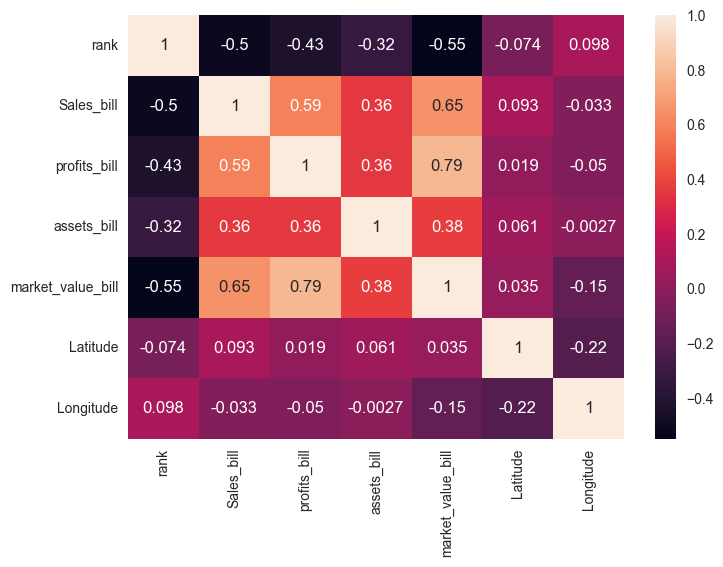

In [383]:
sns.heatmap(df1.corr(),annot=True)

<Axes: >

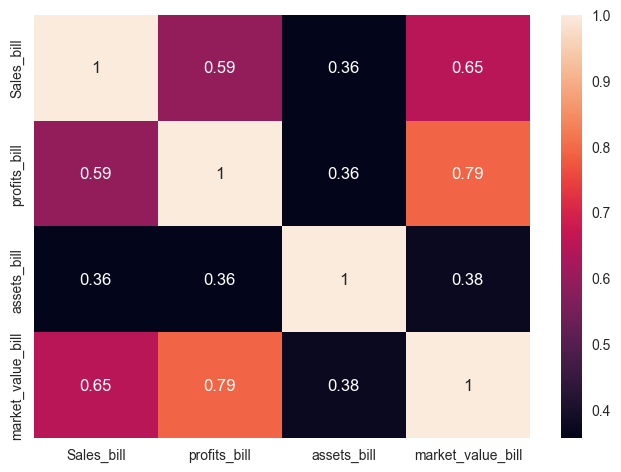

In [342]:
# Finding correlation in numerical features

sns.heatmap(df1[['Sales_bill', 'profits_bill', 'assets_bill','market_value_bill']].corr(),annot=True)

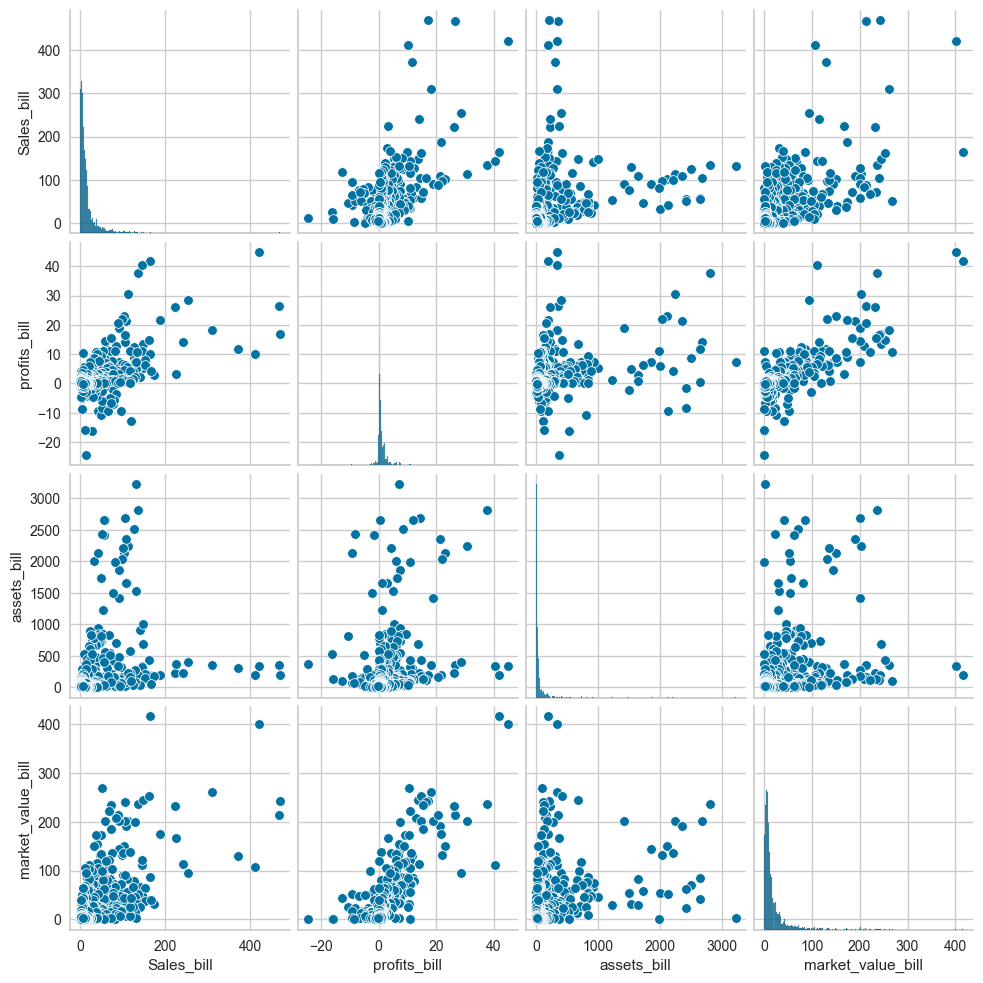

In [343]:
# Finding distribution in numerical features

sns.pairplot(df1[['Sales_bill', 'profits_bill', 'assets_bill','market_value_bill']])
plt.show()

The data is not normally distributed.

# Pre Processing and Training using Pycaret module

In [344]:
df2 = df.copy()

In [345]:
s = setup(df2, target = df2['Market Value ($billion)'], session_id = 123)

,Description,Value
0,Session id,123
1,Target,Market Value ($billion)_y
2,Target type,Regression
3,Original data shape,"(1924, 11)"
4,Transformed data shape,"(1924, 16)"
5,Transformed train set shape,"(1346, 16)"
6,Transformed test set shape,"(578, 16)"
7,Numeric features,7
8,Categorical features,3
9,Preprocess,True


In [346]:
# compare baseline models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,0.0190,0.0016,0.0374,1.0000,0.0026,0.0025,0.0280
lar,Least Angle Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0260
llar,Lasso Least Angle Regression,0.0190,0.0016,0.0375,1.0000,0.0026,0.0026,0.0280
en,Elastic Net,0.0206,0.0018,0.0396,1.0000,0.0030,0.0028,0.0260
huber,Huber Regressor,0.1941,0.1077,0.3093,0.9999,0.0399,0.0353,0.0310
par,Passive Aggressive Regressor,0.2922,0.1770,0.3789,0.9998,0.0661,0.0746,0.0350
ridge,Ridge Regression,0.2765,0.2729,0.5085,0.9997,0.0501,0.0568,0.0270
br,Bayesian Ridge,0.2526,0.2493,0.4609,0.9997,0.0460,0.0529,0.0330
lr,Linear Regression,0.2764,0.2729,0.5085,0.9997,0.0501,0.0568,0.2440
knn,K Neighbors Regressor,6.1939,207.3462,13.8131,0.7783,0.4651,0.6982,0.0320


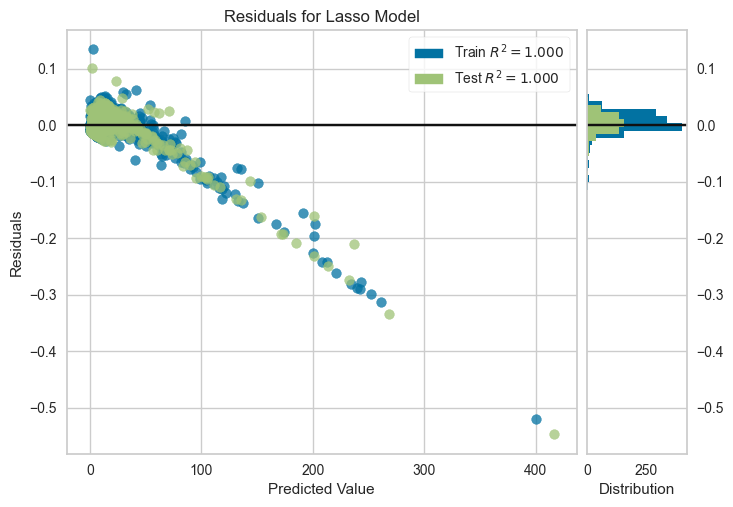

In [347]:
# plot residuals
plot_model(best, plot = 'residuals')

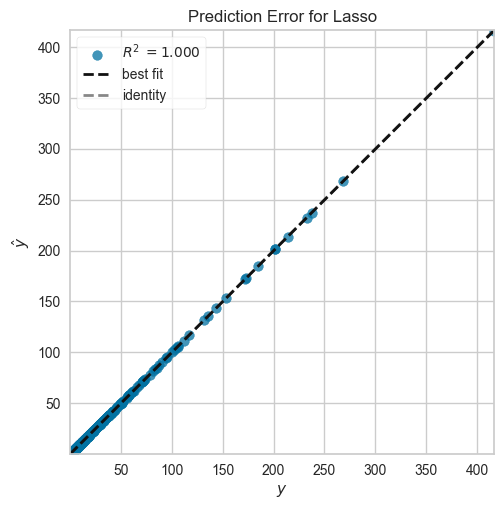

In [348]:
# plot error
plot_model(best, plot = 'error')

# Prediction

In [349]:
# predict on test set
holdout_pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso Regression,0.0204,0.0019,0.0441,1.0000,0.0028,0.0021


In [350]:
# show predictions df2
holdout_pred.head()

,Global Rank,Company,Sales ($billion),Profits ($billion),Assets ($billion),Market Value ($billion)_x,Country,Continent,Latitude,Longitude,Market Value ($billion)_y,prediction_label
1058,1099,Intuit,4.200000,0.8,5.100000,19.400000,USA,North America,37.090240,-95.712891,19.400000,19.393616
437,457,Praxair,11.200000,1.7,18.100000,33.599998,USA,North America,37.090240,-95.712891,33.599998,33.596871
1149,1191,Greentown China Holdings,5.600000,0.8,17.299999,3.200000,China,Asia,35.861660,104.195396,3.200000,3.214441
546,567,Quanta Computer,34.400002,0.8,24.600000,8.500000,Taiwan,Asia,23.697809,120.960518,8.500000,8.530010
657,682,NKSJ Holdings,30.900000,-1.1,105.199997,9.400000,Japan,Asia,36.204823,138.252930,9.400000,9.426600


# Hyperparameter Tuning

In [351]:
lasso = create_model('lasso')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0208,0.0018,0.0419,1.0000,0.0020,0.0017
1,0.0201,0.0011,0.0336,1.0000,0.0022,0.0023
2,0.0144,0.0005,0.0227,1.0000,0.0020,0.0021
3,0.0296,0.0055,0.0743,1.0000,0.0023,0.0023
4,0.0150,0.0006,0.0244,1.0000,0.0021,0.0021
5,0.0170,0.0010,0.0321,1.0000,0.0045,0.0026
6,0.0172,0.0011,0.0325,1.0000,0.0042,0.0063
7,0.0183,0.0012,0.0351,1.0000,0.0025,0.0021
8,0.0175,0.0012,0.0341,1.0000,0.0020,0.0020


In [352]:
# tune hyperparameters of lasso
tuned_lasso = tune_model(lasso)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [353]:

# to access the tuner object you can set return_tuner = True
tuned_lasso, tuner = tune_model(lasso, return_tuner=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0112,0.0005,0.0226,1.0000,0.0011,0.0009
1,0.0107,0.0003,0.0180,1.0000,0.0012,0.0012
2,0.0077,0.0001,0.0122,1.0000,0.0011,0.0011
3,0.0159,0.0016,0.0400,1.0000,0.0012,0.0012
4,0.0081,0.0002,0.0132,1.0000,0.0012,0.0011
5,0.0091,0.0003,0.0173,1.0000,0.0024,0.0014
6,0.0092,0.0003,0.0175,1.0000,0.0023,0.0034
7,0.0098,0.0004,0.0189,1.0000,0.0013,0.0011
8,0.0095,0.0003,0.0184,1.0000,0.0011,0.0011


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [354]:
# model object
tuned_lasso

Lasso(random_state=123)

# Testing

In [355]:
def preprocess(df):
    
    df = df.copy()
    
    # Drop unused columns
    df = df.drop(['Global Rank', 'Company','Continent','Latitude','Longitude',], axis=1)
    
    # One-hot encode Categorical feature columns
    le = LabelEncoder()
    df['Country'] = le.fit_transform(df['Country'])
    
    # Split df into X and y
    y = df['Market Value ($billion)']
    X = df.drop('Market Value ($billion)', axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = preprocess(df)



In [356]:
model = Lasso(random_state=123)
model.fit(X_train,y_train)
pred_lasso = model.predict(X_test)

In [357]:
model_compare_lasso = pd.DataFrame({'y_test': y_test, 'lasso_pred': pred_lasso})
model_compare_lasso

,y_test,lasso_pred
48,87.2,66.207424
1279,11.5,13.728354
1159,4.7,11.663980
1089,10.2,11.439848
309,10.2,30.275120
...,...,...
654,13.6,19.032222
1318,0.9,13.960623
142,58.0,54.176716
1693,1.0,12.890961


In [359]:
models = {
    "                     Linear Regression": LinearRegression(),
    " Linear Regression (L2 Regularization)": Ridge(),
    " Linear Regression (L1 Regularization)": Lasso(),
    "                   K-Nearest Neighbors": KNeighborsRegressor(),
    "                        Neural Network": MLPRegressor(),
    "                         Decision Tree": DecisionTreeRegressor(),
    "                         Random Forest": RandomForestRegressor(),
    "                     Gradient Boosting": GradientBoostingRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

                     Linear Regression trained.
 Linear Regression (L2 Regularization) trained.
 Linear Regression (L1 Regularization) trained.
                   K-Nearest Neighbors trained.
                        Neural Network trained.
                         Decision Tree trained.
                         Random Forest trained.
                     Gradient Boosting trained.


In [360]:
for name, model in models.items():
    r2 = model.score(X_test, y_test)
    print(name + " R^2: {:.4f}".format(r2))

                     Linear Regression R^2: 0.6349
 Linear Regression (L2 Regularization) R^2: 0.6349
 Linear Regression (L1 Regularization) R^2: 0.6363
                   K-Nearest Neighbors R^2: 0.5064
                        Neural Network R^2: 0.6632
                         Decision Tree R^2: 0.4910
                         Random Forest R^2: 0.6235
                     Gradient Boosting R^2: 0.6824


Choosing Gradient Bossting Regressor as the model for testing, because it has the best score.

In [391]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    rmse = np.sqrt(np.mean((y_test - y_pred)**2))
    print(name + " RMSE: {:.2f}".format(rmse))

                     Linear Regression RMSE: 20.12
 Linear Regression (L2 Regularization) RMSE: 20.12
 Linear Regression (L1 Regularization) RMSE: 20.08
                   K-Nearest Neighbors RMSE: 23.40
                        Neural Network RMSE: 19.33
                         Decision Tree RMSE: 23.76
                         Random Forest RMSE: 20.43
                     Gradient Boosting RMSE: 18.77


In [361]:
model_gb = GradientBoostingRegressor()
model_gb.fit(X_train,y_train)
pred_gb = model_gb.predict(X_test)

In [374]:
model_compare_gb = pd.DataFrame({'y_test': y_test, 'gb_pred': pred_gb})
model_compare_gb

,y_test,gb_pred
48,87.2,83.351886
1279,11.5,12.567776
1159,4.7,5.101018
1089,10.2,15.537020
309,10.2,23.124774
...,...,...
654,13.6,16.387662
1318,0.9,11.984960
142,58.0,103.590638
1693,1.0,9.112356


In [397]:
model_dt = DecisionTreeRegressor()
model_dt.fit(X_train,y_train)
pred_dt = model_dt.predict(X_test)
model_compare_dt = pd.DataFrame({'y_test': y_test, 'dt_pred': pred_dt})
model_compare_dt

,y_test,dt_pred
48,87.2,76.9
1279,11.5,20.6
1159,4.7,4.0
1089,10.2,8.6
309,10.2,29.2
...,...,...
654,13.6,18.0
1318,0.9,3.2
142,58.0,150.6
1693,1.0,5.5


In [398]:
df[df['Market Value ($billion)'] == df['Market Value ($billion)'].max()]

,Global Rank,Company,Sales ($billion),Profits ($billion),Assets ($billion),Market Value ($billion),Country,Continent,Latitude,Longitude
15,15,Apple,164.7,41.7,196.1,416.6,USA,North America,37.09024,-95.712891


In [399]:
df.loc[15]

Global Rank                           15
Company                            Apple
Sales ($billion)                   164.7
Profits ($billion)                  41.7
Assets ($billion)                  196.1
Market Value ($billion)            416.6
Country                              USA
Continent                  North America
Latitude                        37.09024
Longitude                     -95.712891
Name: 15, dtype: object

In [396]:
pred_gb[15]

13.780954099333961

In [373]:
df[df['Market Value ($billion)'] == df['Market Value ($billion)'].min()]

,Global Rank,Company,Sales ($billion),Profits ($billion),Assets ($billion),Market Value ($billion),Country,Continent,Latitude,Longitude
1882,1957,Ambac Financial Group,0.7,-0.3,27.0,0.0,USA,North America,37.09024,-95.712891
